In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

/Users/sofiepalmuskronborg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## visuals + stats of top labels

In [17]:
data = pd.read_csv("søndagsmagi.csv")

# sort away duplicate ad texts coming from the same politician -> 58.574
data = data.drop_duplicates(subset=["ad_creative_body", "page_id"])

In [48]:

data["labels"] = data["labels"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
data["scores"] = data["scores"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Retrieving first instance in each column
data["top_label"] = data["labels"].str[0]
data["top_score"] = data["scores"].str[0]

In [55]:
#data.to_csv("søndagsmagii.csv", index=False)

In [49]:
top_labels = (data["top_label"].value_counts()).iloc[:18]  # all labels

# calcu the amount + % for each top
top_percentages = (
    data["top_label"].value_counts(normalize=True).iloc[:18]
) * 100

# Print the counts and percentages in a readable format
print("Stats on top labels:\n")
for label, count, percentage in zip(
    top_labels.index, top_labels.values, top_percentages.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

Stats on top labels:

Call for Action: 38299 ads (65.39%)
Healthcare: 3331 ads (5.69%)
Law and Crime: 3251 ads (5.55%)
Economy: 2587 ads (4.42%)
Other: 1861 ads (3.18%)
Defense: 1578 ads (2.69%)
Immigration: 1553 ads (2.65%)
Education and Culture: 1543 ads (2.63%)
Climate: 1114 ads (1.90%)
Foreign Affair: 1029 ads (1.76%)
Labor and Employment: 828 ads (1.41%)
Agriculture: 509 ads (0.87%)
Civil Rights: 457 ads (0.78%)
Transport: 271 ads (0.46%)
Social Welfare: 189 ads (0.32%)
Housing: 174 ads (0.30%)


## visuals of top labels for both parties

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_10469/1338697745.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_counts.index, y=party_counts.values, palette="Blues")
/Users/sofiepalmuskronborg/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sofiepalmuskronborg/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd

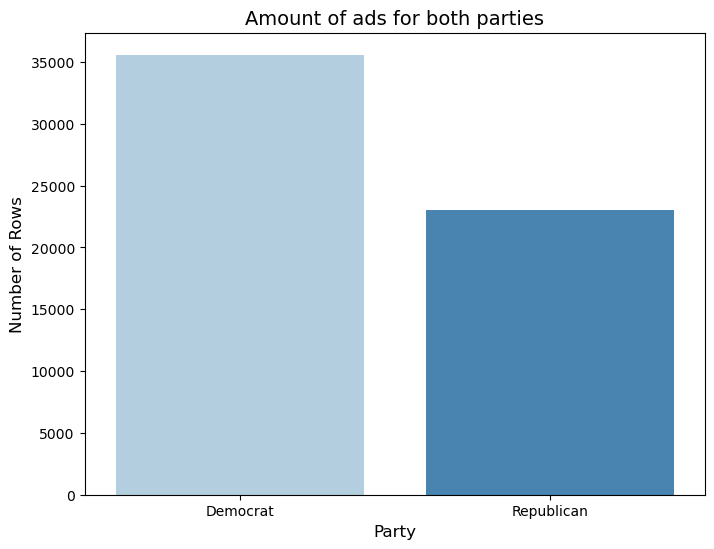

In [50]:
# Filter data rows based on party to work with stats on the individual parties
label_data_D = data[data["party"] == "Democrat"]
label_data_R = data[data["party"] == "Republican"]

# get an value of the count of rows for both parties/politicians
party_counts = data["party"].value_counts()

# bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=party_counts.index, y=party_counts.values, palette="Blues")
plt.title("Amount of ads for both parties", fontsize=14)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.show()

## democrats

Text(0, 0.5, 'Frequency')

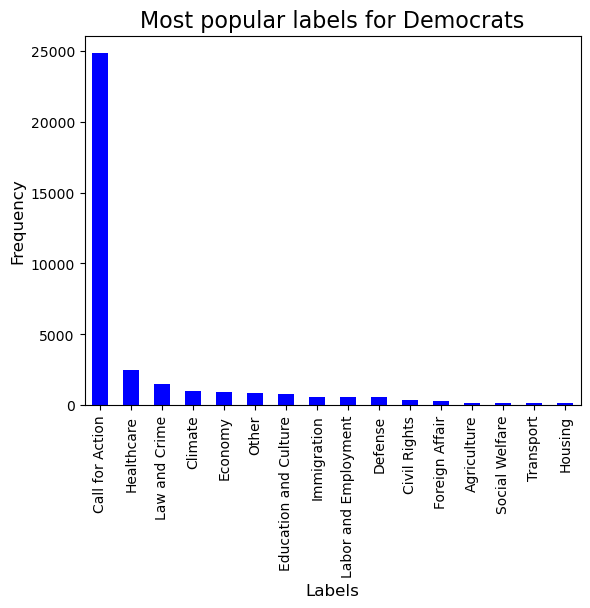

In [27]:
top_labels_D = (label_data_D["top_label"].value_counts()).iloc[:16]  # all labels

# plotting
top_labels_D.plot(kind="bar", color="blue")
plt.title("Most popular labels for Democrats", fontsize=16)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [56]:
# calcu the amount + % for each top
top_D_percentages = (
    label_data_D["top_label"].value_counts(normalize=True).iloc[:16]
) * 100

# Print the counts and percentages in a readable format
print("Stats for 'Democratic ads' and top labels:\n")
for label, count, percentage in zip(
    top_labels_D.index, top_labels_D.values, top_D_percentages.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

Stats for 'Democratic ads' and top labels:

Call for Action: 24837 ads (69.84%)
Healthcare: 2513 ads (7.07%)
Law and Crime: 1502 ads (4.22%)
Climate: 986 ads (2.78%)
Economy: 966 ads (2.71%)
Other: 889 ads (2.50%)
Education and Culture: 770 ads (2.17%)
Immigration: 610 ads (1.72%)
Labor and Employment: 608 ads (1.71%)
Defense: 603 ads (1.69%)
Civil Rights: 384 ads (1.08%)
Foreign Affair: 285 ads (0.80%)
Agriculture: 167 ads (0.47%)
Social Welfare: 156 ads (0.44%)
Transport: 150 ads (0.42%)
Housing: 130 ads (0.37%)


## republicans

Text(0, 0.5, 'Frequency')

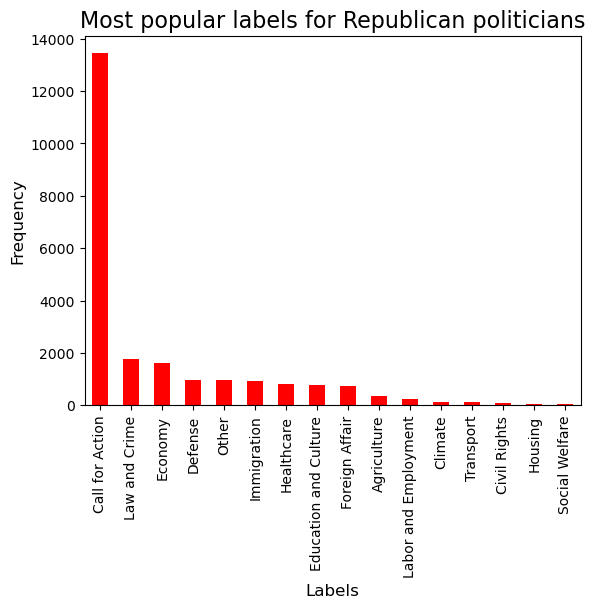

In [53]:
top_labels_R = (label_data_R["top_label"].value_counts()).iloc[:16]

# plotting
top_labels_R.plot(kind="bar", color="red")

plt.title("Most popular labels for Republican politicians", fontsize=16)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [57]:
top_R_percentages = (
    label_data_R["top_label"].value_counts(normalize=True).iloc[:16]
) * 100

# Print the counts and percentages in a readable format
print("Stats for 'Republican ads' and their top labels:\n")
for label, count, percentage in zip(
    top_labels_R.index, top_labels_R.values, top_R_percentages.values
):
    print(f"{label}: {count} ads ({percentage:.2f}%)")

Stats for 'Republican ads' and their top labels:

Call for Action: 13446 ads (58.49%)
Law and Crime: 1748 ads (7.60%)
Economy: 1621 ads (7.05%)
Defense: 975 ads (4.24%)
Other: 971 ads (4.22%)
Immigration: 940 ads (4.09%)
Healthcare: 815 ads (3.55%)
Education and Culture: 772 ads (3.36%)
Foreign Affair: 744 ads (3.24%)
Agriculture: 342 ads (1.49%)
Labor and Employment: 220 ads (0.96%)
Climate: 126 ads (0.55%)
Transport: 120 ads (0.52%)
Civil Rights: 73 ads (0.32%)
Housing: 43 ads (0.19%)
Social Welfare: 33 ads (0.14%)


## visuals of the top vektor scores

In [5]:
data = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/Speciale/Data/deberta_top_labels.csv", index_col=0
)

Text(0.5, 0, 'labels score')

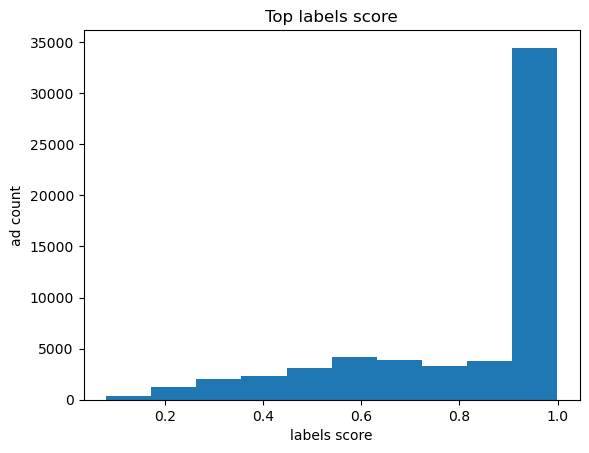

In [58]:
data["top_score"].plot(kind="hist")
plt.title("Top labels score")
plt.ylabel("ad count")
plt.xlabel("labels score")

Text(0.5, 1.0, 'Top labels score')

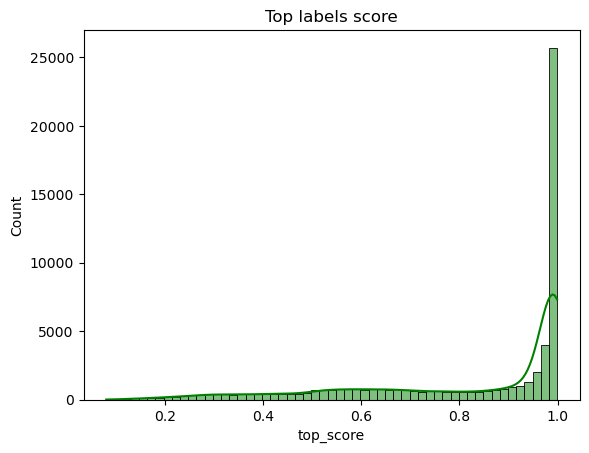

In [59]:
sns.histplot(data["top_score"], kde=True, color="g").set_title(
    "Top labels score"
)

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_10469/1784651008.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["top_score"], color='b', shade=True, label="All top labels")


Text(0.5, 0, 'Top labels score')

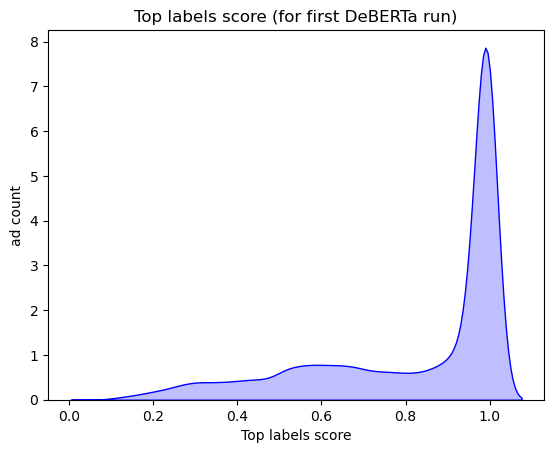

In [60]:
sns.kdeplot(data["top_score"], color='b', shade=True, label="All top labels")
plt.title("Top labels score (for first DeBERTa run)")
plt.ylabel("ad count")
plt.xlabel("Top labels score")

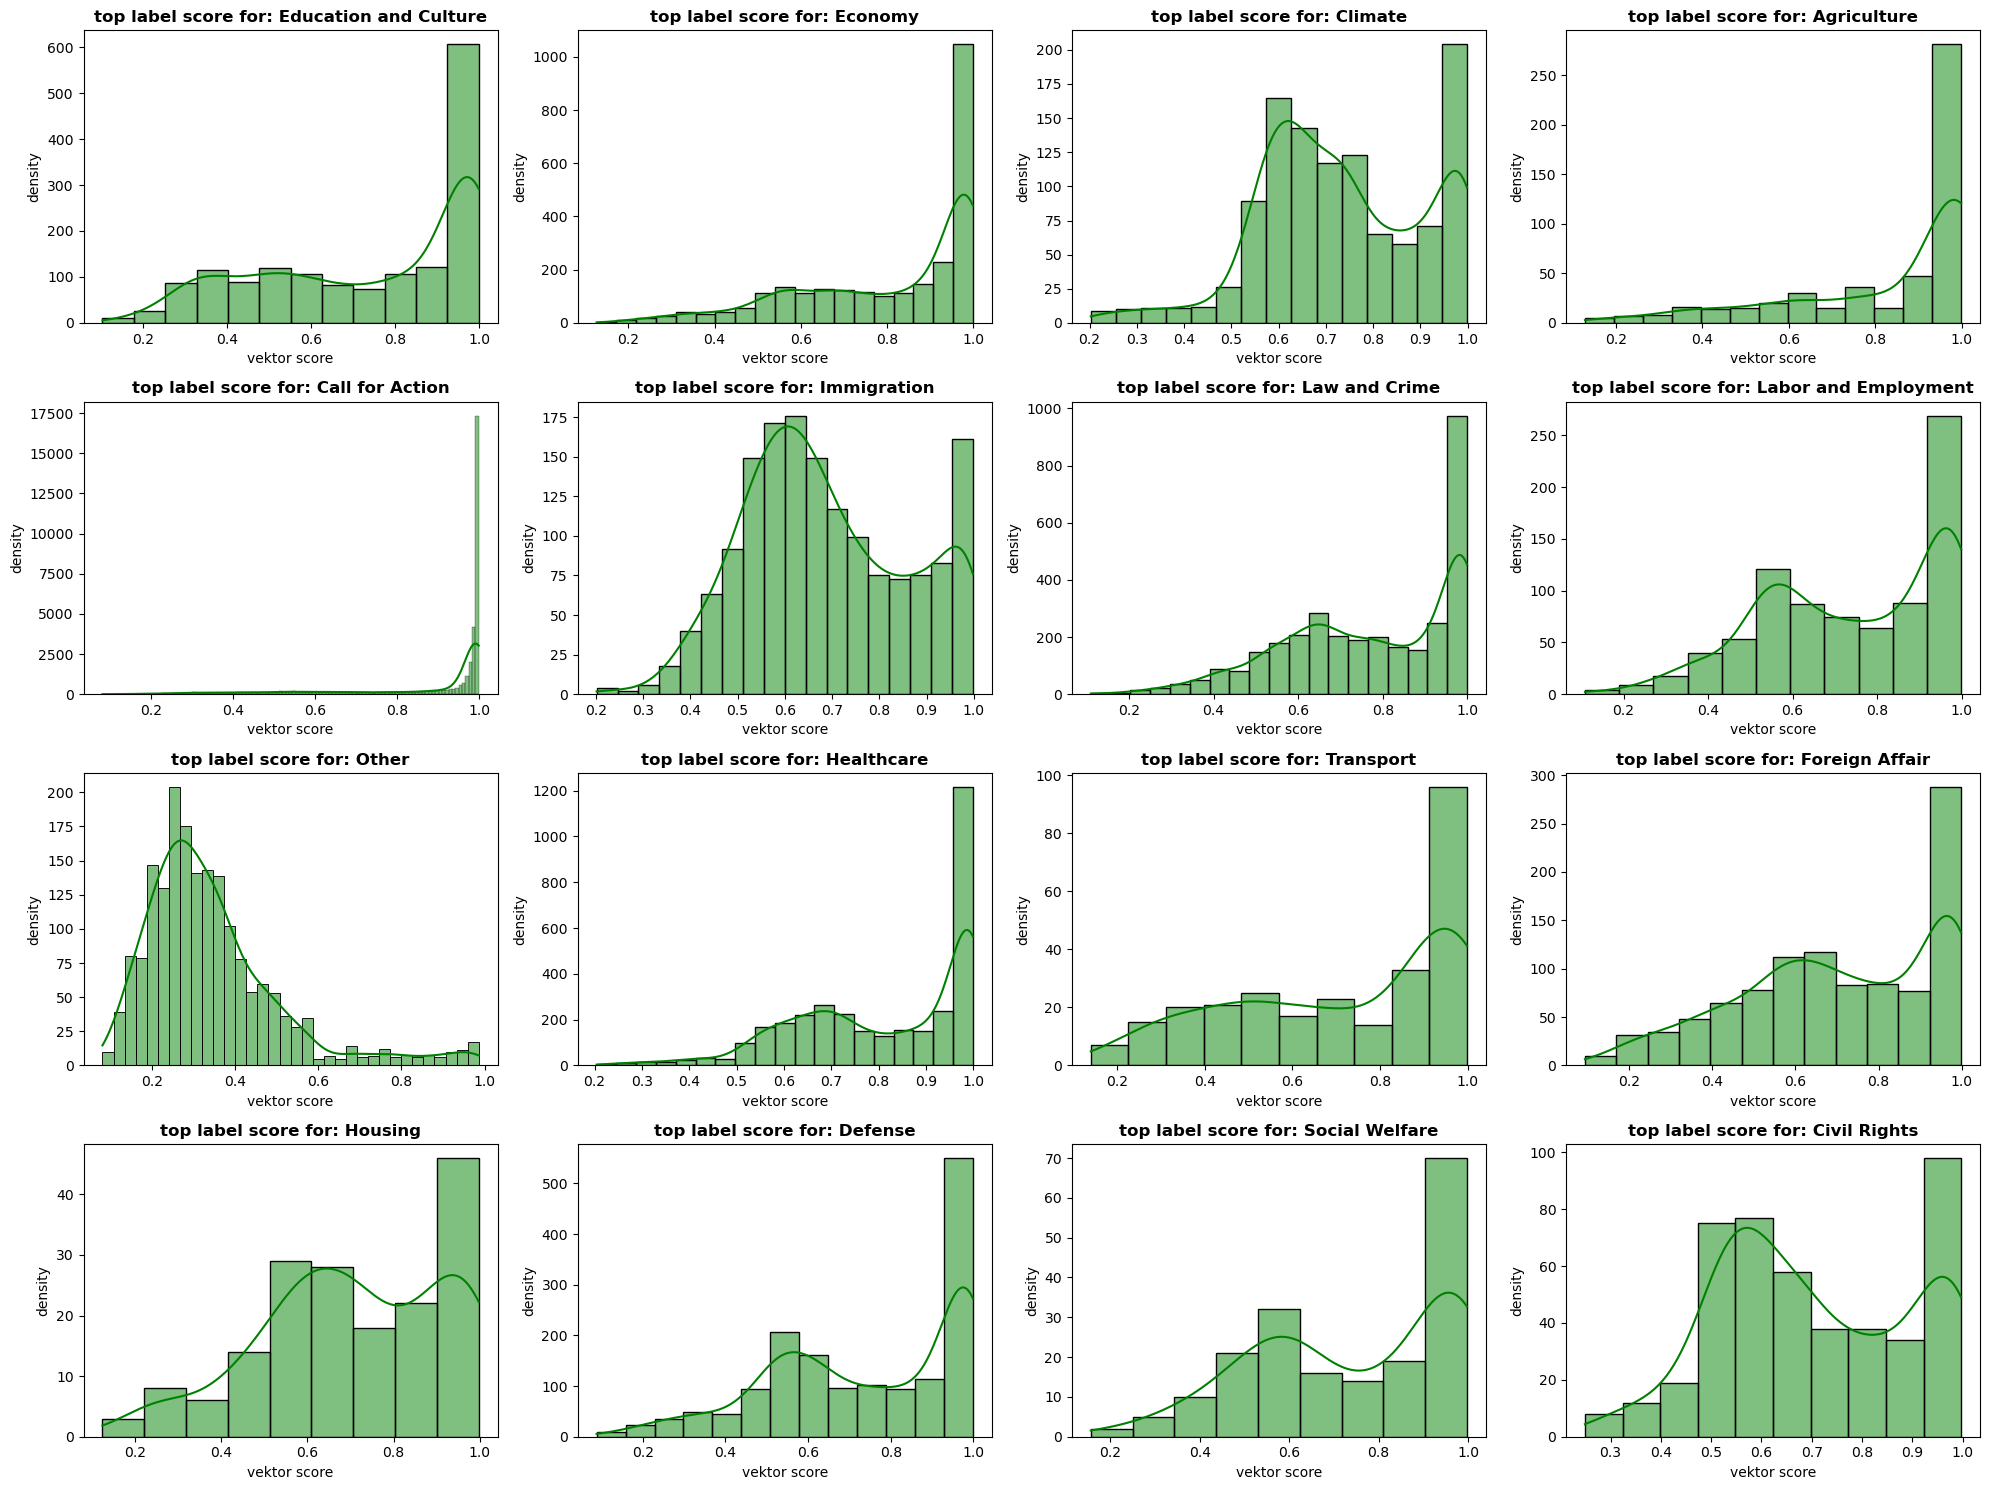

In [63]:
fig, axs = plt.subplots(
    4, 4, figsize=(20, 15)
)  
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for e

# Loop through each unique category and create a KDE plot in the respective subplot
for x, category in enumerate(data["top_label"].unique()):
    sns.histplot(data=data[data["top_label"] == category], x="top_score", ax=axs[x], kde=True, color='g', fill=True)
    axs[x].set_title(f"top label score for: {category}", weight="bold")
    axs[x].set_xlabel("vektor score")
    axs[x].set_ylabel("density")

plt.tight_layout()
plt.show()

## distribution of tokens above max limit

In [7]:
df_above = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/above_512_finish.csv",
    index_col=0,
)

df_below = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/Thesis/Data/tokens_lim/under_512.csv",
    index_col=0,
)

Text(0.5, 0, 'Number of tokens')

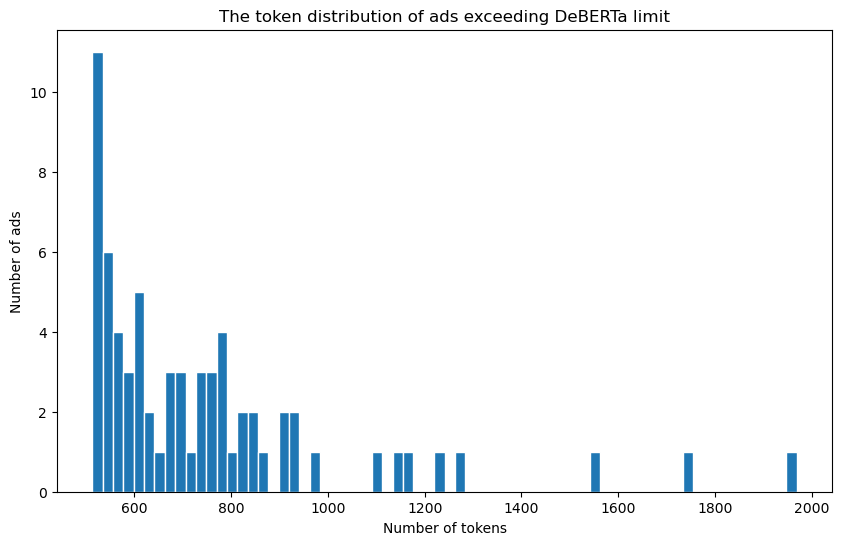

In [8]:
plt.figure(figsize=(10, 6))

plt.title("The token distribution of ads exceeding DeBERTa limit")
df_above["num_tokens"].plot(kind="hist", bins=68, edgecolor="white")
plt.ylabel("Number of ads")
plt.xlabel("Number of tokens")

Text(0.5, 0, 'Number of tokens')

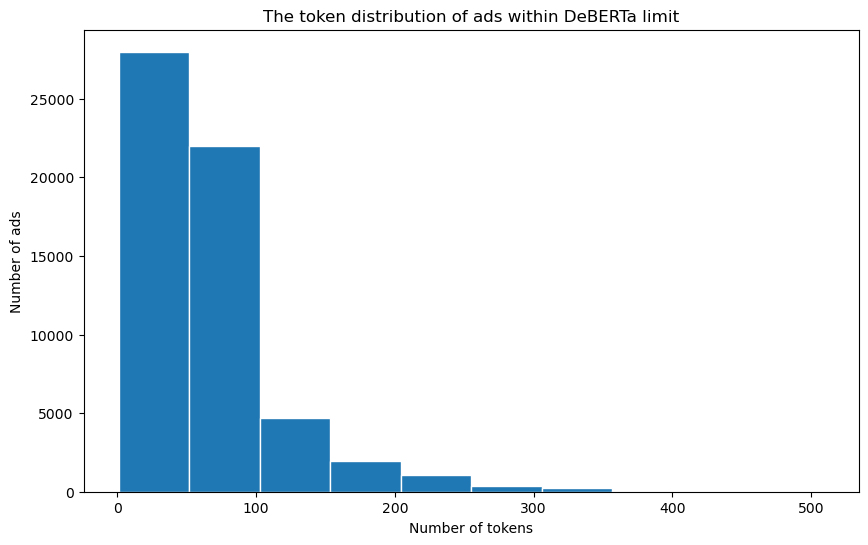

In [12]:
plt.figure(figsize=(10, 6))

plt.title("The token distribution of ads within DeBERTa limit")
df_below["num_tokens"].plot(kind="hist",edgecolor="white")
plt.ylabel("Number of ads")
plt.xlabel("Number of tokens")

In [17]:
count_below_100tk = df_below["num_tokens"] < 100

In [36]:
x_below = (df_below["num_tokens"] < 100).sum()

percentage_x = (x_below / 58449) * 100
print(f"Count of ads below/equal to 100 tokens: {x_below} and the percentage {percentage_x:.2f}%")

Count of ads below/equal to 100 tokens: 49465 and the percentage 84.63%
